# Курсовой проект для курса "Python для Data Science"

Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Целевая переменная:
Price

Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Требования к решению:
1. R2 > 0.6
2. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
3. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv 
Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).

In [532]:
import numpy as np
import pandas as pd

In [533]:
df = pd.read_csv('train.csv')

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [535]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [536]:
df.set_index('Id', inplace=True)

In [537]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [538]:
import matplotlib.pyplot as plt
import seaborn as sns

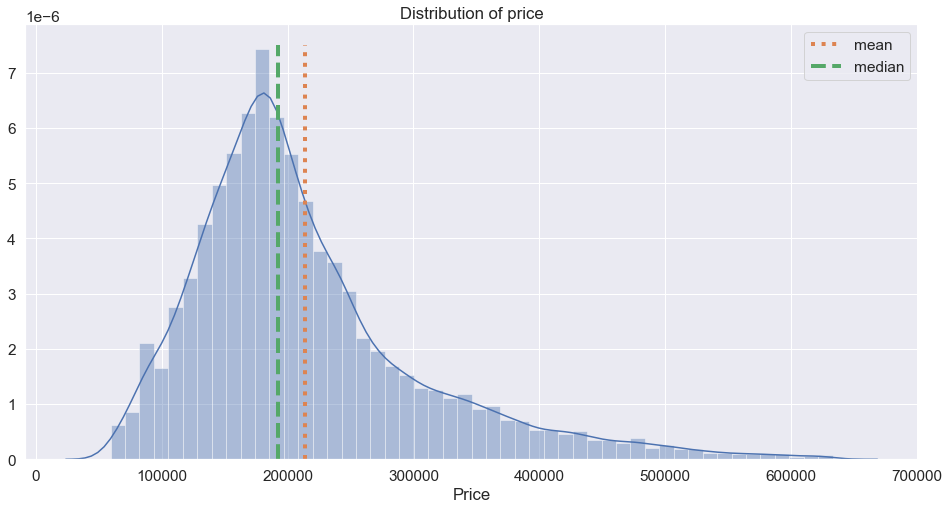

In [539]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()

plt.figure(figsize = (16, 8))
sns.distplot(df['Price'])

y = np.linspace(0, 0.0000075, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

In [540]:
def process_outliers(df, col_name, is_mode=False):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    upp = q3 + 1.5 * iqr
    if is_mode:
        df[col_name] = np.where((df[col_name] < low) | (df[col_name] > upp), df[col_name].mode(), df[col_name])
    else:
        df[col_name] = np.where((df[col_name] < low) | (df[col_name] > upp), df[col_name].mean(), df[col_name])
    return df

In [541]:
def preprocess_data(df):
    df['HouseYear'] = np.where(df['HouseYear'] > 2020, df['HouseYear'].mode(), df['HouseYear'])
    
    df = process_outliers(df, 'Rooms', is_mode=True)
    df = process_outliers(df, 'Square')
    df = process_outliers(df, 'LifeSquare')
    df = process_outliers(df, 'KitchenSquare')
    df = process_outliers(df, 'Floor', is_mode=True)
    df = process_outliers(df, 'HouseFloor', is_mode=True)
    df = process_outliers(df, 'Ecology_1', is_mode=True)
    df = process_outliers(df, 'Social_2', is_mode=True)
    df = process_outliers(df, 'Social_3', is_mode=True)
    
    df['LifeSquare'].interpolate(method='nearest', inplace=True)
    df['LifeSquare'].fillna(df['LifeSquare'].mean(), inplace=True)
    df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor'] = df.loc[df['Floor'] > df['HouseFloor'], 'Floor']
    df.loc[df['LifeSquare'] > df['Square'], 'Square'] = df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare']
    
    df['HouseYear'] = df['HouseYear'] // 5 * 5
    df['Ecology_2'] = df['Ecology_2'].astype('category')
    df['Ecology_2'] = df['Ecology_2'].cat.codes
    df['Ecology_3'] = df['Ecology_3'].astype('category')
    df['Ecology_3'] = df['Ecology_3'].cat.codes
    df['Shops_2'] = df['Shops_2'].astype('category')
    df['Shops_2'] = df['Shops_2'].cat.codes
    return df

In [542]:
df.drop(columns='Healthcare_1', inplace=True)
df = preprocess_data(df)

In [543]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))

In [544]:
X = df.drop(columns=['Price'])
y = df['Price']

In [545]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [546]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV

def get_coeffs():
    gb_model = GradientBoostingRegressor(random_state=20)

    params = {'n_estimators':[50, 100, 200, 400], 
              'max_depth':[3, 5, 7, 10]}

    gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=5, random_state=20, shuffle=True), n_jobs=-1)
    gs.fit(X, y)
    return gs.best_params_
#get_coeffs()
#{'max_depth': 5, 'n_estimators': 200}

In [547]:
model = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_preds(y_test, y_pred)

R2:	0.682
MAE:	30433.334
MSE:	2733165573.06


In [548]:
df_eval = pd.read_csv('test.csv')
df_eval.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [549]:
X_eval = df_eval[X.columns].copy()
X_eval = preprocess_data(X_eval)
y_eval = model.predict(X_eval)

In [550]:
df_eval['Price'] = y_eval
df_eval[['Id', 'Price']].to_csv('AZhumabayev_predictions.csv', index=False)